In [50]:
!pip3 install pycocotools

In [51]:
import os
import random
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from pycocotools.coco import COCO

In [52]:
# Define paths to the dataset directories
train_dir = '/kaggle/input/aquarium-dataset/Aquarium Combined/train/'
test_dir = '/kaggle/input/aquarium-dataset/Aquarium Combined/test/'
valid_dir = '/kaggle/input/aquarium-dataset/Aquarium Combined/valid/'

# Using PYCOCO TOOLS

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


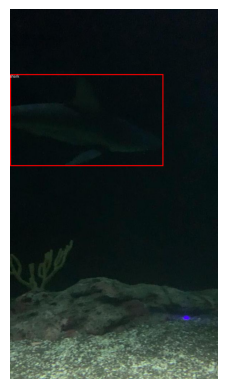

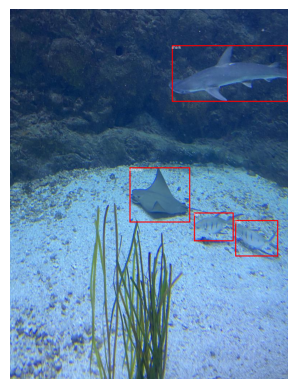

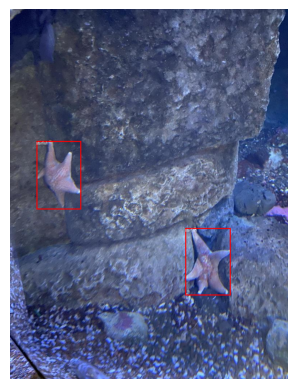

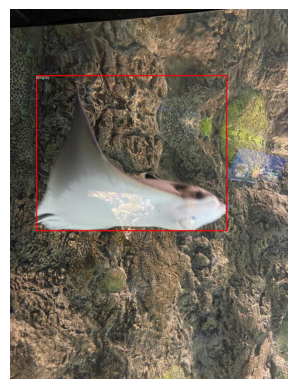

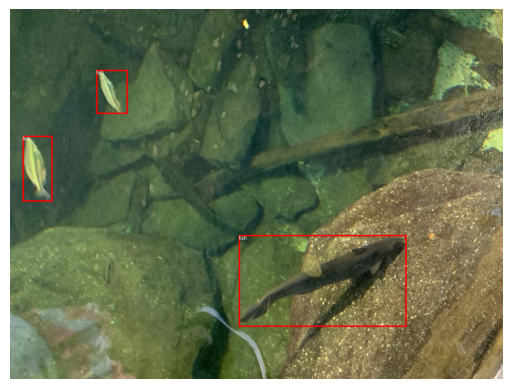

In [53]:
import os
import random
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from pycocotools.coco import COCO

# Define paths to the dataset directories
train_dir = '/kaggle/input/aquarium-dataset/Aquarium Combined/train/'
annotations_path = os.path.join(train_dir, '_annotations.coco.json')

# Load the COCO annotations
def load_coco_annotations(annotations_file):
    return COCO(annotation_file=annotations_file)

# Function to visualize image with bounding boxes and labels
def visualize_coco_image(coco, img_dir, img_info):
    img_path = os.path.join(img_dir, img_info['file_name'])
    
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)

    # Load annotations for this image
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)
    
    # Draw bounding boxes and class labels
    for ann in anns:
        bbox = ann['bbox']
        category = coco.loadCats(ann['category_id'])[0]['name']  # Get class name
        
        # COCO format: bbox = [x_min, y_min, width, height]
        x_min, y_min, width, height = bbox
        x_max, y_max = x_min + width, y_min + height
        
        # Draw the bounding box
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
        
        # Add the class label on top of the bounding box
        draw.text((x_min, y_min), category, fill="white")
    
    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to randomly visualize 5 images from the dataset
def visualize_random_images(coco, img_dir):
    img_ids = coco.getImgIds()
    sample_img_ids = random.sample(img_ids, 5)
    
    for img_id in sample_img_ids:
        img_info = coco.loadImgs(img_id)[0]
        visualize_coco_image(coco, img_dir, img_info)

# Load the annotations
coco = load_coco_annotations(annotations_path)

# Visualize random images from the training dataset
visualize_random_images(coco, train_dir)


# Not Using Pycoco tools

In [54]:
import os
import json
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [55]:
# Directory path containing the images and the annotations
directory_path = '/kaggle/input/aquarium-dataset/Aquarium Combined/train'

In [56]:
# Load annotations from the JSON file
json_path = os.path.join(directory_path, '_annotations.coco.json')
print(json_path)

/kaggle/input/aquarium-dataset/Aquarium Combined/train/_annotations.coco.json


In [57]:
with open(json_path) as f:
    annotations = json.load(f)
    
print(annotations)

{'info': {'year': '2020', 'version': '2', 'description': 'Exported from roboflow.ai', 'contributor': 'Roboflow', 'url': 'https://public.roboflow.ai/object-detection/aquarium', 'date_created': '2020-11-18T19:53:47+00:00'}, 'licenses': [{'id': 1, 'url': 'https://creativecommons.org/licenses/by/4.0/', 'name': 'CC BY 4.0'}], 'categories': [{'id': 0, 'name': 'creatures', 'supercategory': 'none'}, {'id': 1, 'name': 'fish', 'supercategory': 'creatures'}, {'id': 2, 'name': 'jellyfish', 'supercategory': 'creatures'}, {'id': 3, 'name': 'penguin', 'supercategory': 'creatures'}, {'id': 4, 'name': 'puffin', 'supercategory': 'creatures'}, {'id': 5, 'name': 'shark', 'supercategory': 'creatures'}, {'id': 6, 'name': 'starfish', 'supercategory': 'creatures'}, {'id': 7, 'name': 'stingray', 'supercategory': 'creatures'}], 'images': [{'id': 0, 'license': 1, 'file_name': 'IMG_2489_jpeg_jpg.rf.ffb357957a29cdef43f3fdfb2a13c417.jpg', 'height': 1024, 'width': 768, 'date_captured': '2020-11-18T19:53:47+00:00'}, 

In [58]:
# Mapping of category IDs to names
category_map = {cat['id']: cat['name'] for cat in annotations['categories']}
print(category_map)

{0: 'creatures', 1: 'fish', 2: 'jellyfish', 3: 'penguin', 4: 'puffin', 5: 'shark', 6: 'starfish', 7: 'stingray'}


In [59]:
# Mapping of image IDs to file names
image_map = {img['id']: img['file_name'] for img in annotations['images']}
print(image_map)

{0: 'IMG_2489_jpeg_jpg.rf.ffb357957a29cdef43f3fdfb2a13c417.jpg', 1: 'IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e45.jpg', 2: 'IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b546635774372fe2.jpg', 3: 'IMG_2402_jpeg_jpg.rf.ff2e5af0a2d1693c155a01d7494fc8e4.jpg', 4: 'IMG_2584_jpeg_jpg.rf.fdf498ef5b1b000a6c51d15dc29ad33a.jpg', 5: 'IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936860212f.jpg', 6: 'IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29eeac0cb.jpg', 7: 'IMG_3138_jpeg_jpg.rf.ff253449ce146d664f1c0fb5f7f25ef5.jpg', 8: 'IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83edf79c2.jpg', 9: 'IMG_2335_jpeg_jpg.rf.fee7aabbe3a95b58fa737bf4537ded6f.jpg', 10: 'IMG_8545_jpg.rf.ff50b7c81c0f9479325eec03e7ce2191.jpg', 11: 'IMG_8512_MOV-2_jpg.rf.00f06559a0df06b71002d0b3dbf1804c.jpg', 12: 'IMG_2481_jpeg_jpg.rf.00a2836323b67c925752c28bccc26ea4.jpg', 13: 'IMG_3169_jpeg_jpg.rf.00b985cb8ddf5da8964dc21435e1bd2c.jpg', 14: 'IMG_2613_jpeg_jpg.rf.03a46725a60afa2d492d463de939b335.jpg', 15: 'IMG_2361_jpeg_jpg.rf.02195fab4639c0b58

In [60]:
# Get annotations for each image
image_annotations = {}
print(image_annotations)
for ann in annotations['annotations']:
    img_id = ann['image_id']
    # print("******* Inside Loop *******")
    if img_id not in image_annotations:
        image_annotations[img_id] = []
    image_annotations[img_id].append(ann)
image_annotations

{}


{0: [{'id': 0,
   'image_id': 0,
   'category_id': 2,
   'bbox': [0, 752, 176, 243],
   'area': 42768,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 1,
   'image_id': 0,
   'category_id': 2,
   'bbox': [126, 738, 431, 184],
   'area': 79304,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 2,
   'image_id': 0,
   'category_id': 2,
   'bbox': [10, 845, 202, 133],
   'area': 26866,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 3,
   'image_id': 0,
   'category_id': 2,
   'bbox': [490, 486, 208, 123],
   'area': 25584,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 4,
   'image_id': 0,
   'category_id': 2,
   'bbox': [665, 265, 102, 55],
   'area': 5610,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 5,
   'image_id': 0,
   'category_id': 2,
   'bbox': [541, 933, 226, 90],
   'area': 20340,
   'segmentation': [],
   'iscrowd': 0}],
 1: [{'id': 6,
   'image_id': 1,
   'category_id': 5,
   'bbox': [106, 442, 69, 198],
   'area': 13662,
   'segmentation': [],
   'iscrowd': 0},

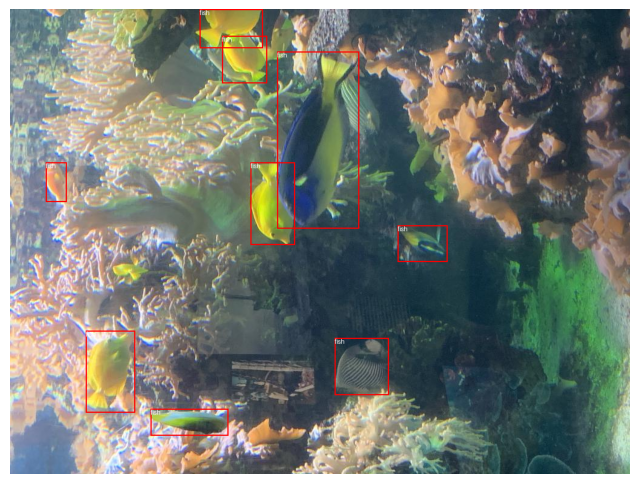

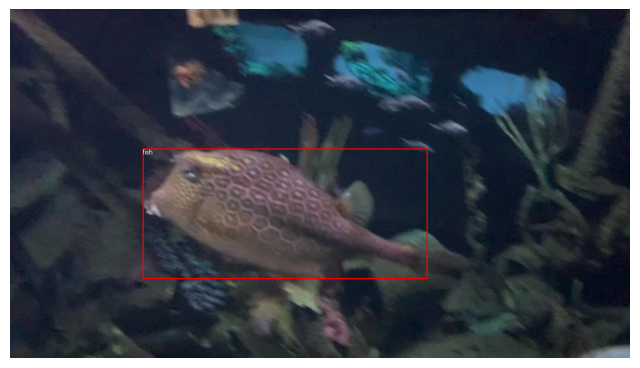

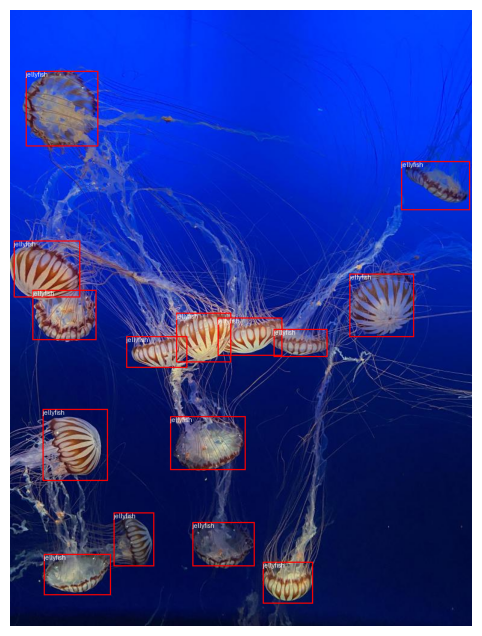

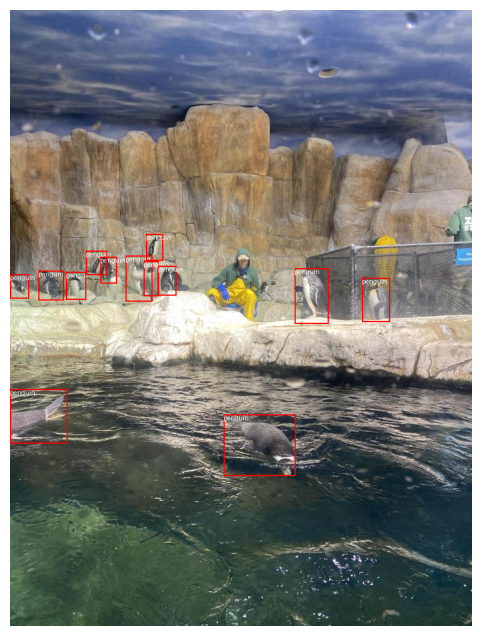

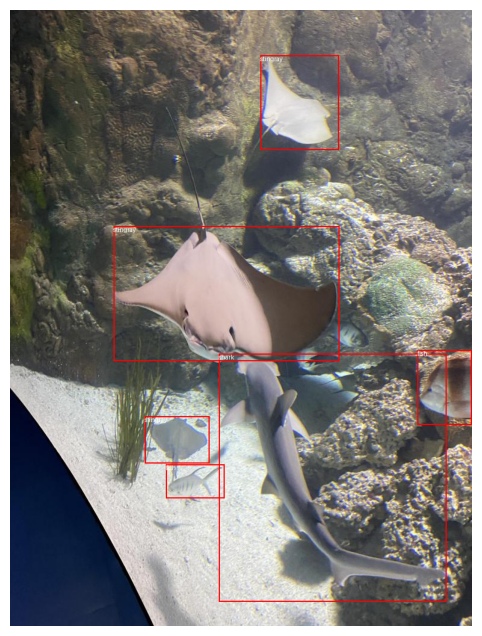

In [61]:
# Function to display image with bounding boxes
def visualize_image(img_id):
    img_file = os.path.join(directory_path, image_map[img_id])
    img = Image.open(img_file)
    draw = ImageDraw.Draw(img)
    
    for ann in image_annotations[img_id]:
        bbox = ann['bbox']
        category_id = ann['category_id']
        class_name = category_map[category_id]
        
        # Bounding box coordinates
        x, y, width, height = bbox
        draw.rectangle([x, y, x+width, y+height], outline="red", width=2)
        draw.text((x, y), class_name, fill="white")
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Visualize 5 images
for img_id in list(image_map.keys())[10:15]:
    visualize_image(img_id)

# Main Code for Faster RCNN Training 

## 1.1 Installing Packages

In [62]:
!pip3 install pycocotools torchsummary

## 1.2 Loading Packages

In [63]:
import os
import numpy as np
import pandas as pd

# Import necessary libraries for data transformation and dataset handling
import albumentations as A  # For data augmentation
from albumentations.pytorch import ToTensorV2  # To convert images to tensor
from torch.utils.data import Dataset, DataLoader  # PyTorch data handling
from pycocotools.coco import COCO  # COCO format handling
import cv2  # For image loading and processing
import torch  # PyTorch main library
from torchvision import models  # Pretrained models from PyTorch
import torch.optim as optim  # Optimizers
from tqdm import tqdm  # For progress bar in training loop
import warnings  # For managing warnings

from torchinfo import summary
import torch
from typing import List, Tuple
import numpy as np

import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random

## 1.2 Ignore warnings

In [64]:
# Suppress warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1.3 Transform the input images

In [65]:
# Data transformations for training data
def get_train_transforms():
    """
    Returns transformation pipeline for training images with augmentations 
    including resizing, flipping, brightness/contrast adjustments, and color jitter.
    """
    return A.Compose([
        A.Resize(600, 600),  # Resize images to 600x600 pixels
        A.HorizontalFlip(p=0.3),  # Apply horizontal flip with a probability of 30%
        A.VerticalFlip(p=0.3),  # Apply vertical flip with a probability of 30%
        A.RandomBrightnessContrast(p=0.1),  # Adjust brightness/contrast with 10% probability
        A.ColorJitter(p=0.1),  # Random color jitter with 10% probability
        ToTensorV2()  # Convert the image to a PyTorch tensor
    ], bbox_params=A.BboxParams(format='coco'))  # Bounding box format in COCO style


## 1.4 Transform Test Images

In [66]:
# Data transformations for test data (without augmentations)
def get_test_transforms():
    """
    Returns transformation pipeline for test images, only resizing and tensor conversion.
    """
    return A.Compose([
        A.Resize(600, 600),  # Resize images to 600x600 pixels
        ToTensorV2()  # Convert the image to a PyTorch tensor
    ], bbox_params=A.BboxParams(format='coco'))  # Bounding box format in COCO style


## 1.5 Creating Custom Class for data laoding

In [67]:
# Custom Dataset class for Aquarium Detection
class AquariumDetection(Dataset):
    def __init__(self, root, split='train', transforms=None):
        """
        Initializes dataset with root path, split (train/test), and transformations.
        Loads COCO annotations and filters images with annotations.

        Parameters:
        - root: path to the dataset
        - split: 'train' or 'test' to select dataset split
        - transforms: data augmentation transformations
        """
        self.root = root
        self.split = split
        self.transforms = transforms
        # Load COCO format annotations
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json"))
        # Filter image IDs that have at least one annotation
        self.ids = [img_id for img_id in sorted(self.coco.imgs.keys())
                    if len(self.coco.getAnnIds(img_id)) > 0]
    
    def __getitem__(self, index):
        """
        Retrieves image and target (bounding boxes and labels) by index.
        
        Parameters:
        - index: index to select image and target
        Returns:
        - Transformed image tensor and target dictionary
        """
        img_id = self.ids[index]  # Get image ID
        image = self.load_image(img_id)  # Load image using ID
        annotations = self.coco.loadAnns(self.coco.getAnnIds(img_id))  # Load annotations
        boxes = [ann['bbox'] + [ann['category_id']] for ann in annotations]  # Extract bounding boxes

        # Apply transformations if specified
        if self.transforms:
            transformed = self.transforms(image=image, bboxes=boxes)
            image = transformed['image']
            boxes = transformed['bboxes']
        
        # Convert bounding boxes to tensor format (x_min, y_min, x_max, y_max)
        boxes = torch.tensor([[x, y, x + w, y + h] for x, y, w, h, _ in boxes], dtype=torch.float32)
        labels = torch.tensor([ann['category_id'] for ann in annotations], dtype=torch.int64)  # Labels
        iscrowd = torch.tensor([ann.get('iscrowd', 0) for ann in annotations], dtype=torch.int64)  # Crowd labels

        # Prepare target dictionary
        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': torch.tensor([img_id]),
            'area': (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),  # Area of boxes
            'iscrowd': iscrowd
        }
        return image.div(255), target  # Normalize image

    def load_image(self, img_id):
        """
        Loads image from file path using OpenCV and converts to RGB.
        
        Parameters:
        - img_id: image ID to load
        Returns:
        - Loaded RGB image
        """
        img_path = self.coco.loadImgs(img_id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, img_path))
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

    def __len__(self):
        """Returns the total number of images with annotations in the dataset."""
        return len(self.ids)

## 1.5 Initialising the custom class data processor

In [68]:
# Model and training setup
dataset_path = "/kaggle/input/aquarium-dataset/Aquarium Combined/"
train_dataset = AquariumDetection(root=dataset_path, transforms=get_train_transforms())

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


## 1.6 Initialising Faster RCNN model

In [69]:
# Modify the Faster R-CNN model for custom class predictions
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(
    model.roi_heads.box_predictor.cls_score.in_features, len(train_dataset.coco.cats)
)

## 1.7 Checking Model Summary

In [70]:
def print_model_summary(model, input_size: Tuple[int, int, int, int] = (1, 3, 600, 600)):
    """
    Prints a detailed summary of a PyTorch model, similar to Keras model.summary()
    
    Parameters:
    - model: PyTorch model to summarize
    - input_size: Tuple of (batch_size, channels, height, width) for input tensor
    """
    try:
        # Create a dummy input tensor for the model
        dummy_input = torch.randn(input_size)
        
        # Get model summary using torchinfo
        model_stats = summary(
            model,
            input_size=(input_size,),
            col_names=["input_size", "output_size", "num_params", "trainable"],
            col_width=20,
            row_settings=["var_names"]
        )
        
        # Print additional model statistics
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        print("\nModel Statistics:")
        print(f"Total Parameters: {total_params:,}")
        print(f"Trainable Parameters: {trainable_params:,}")
        print(f"Non-trainable Parameters: {total_params - trainable_params:,}")
        
        return model_stats
    
    except Exception as e:
        print(f"Error generating model summary: {str(e)}")
        print("\nFalling back to basic summary...")
        
        # Fallback to basic parameter summary
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        
        print("\nBasic Model Statistics:")
        print(f"Total Parameters: {total_params:,}")
        print(f"Trainable Parameters: {trainable_params:,}")
        print(f"Non-trainable Parameters: {total_params - trainable_params:,}")

In [71]:
# Print model summary
print_model_summary(model)


Model Statistics:
Total Parameters: 18,960,979
Trainable Parameters: 18,902,083
Non-trainable Parameters: 58,896


Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
FasterRCNN (FasterRCNN)                                           [1, 3, 600, 600]     [0, 4]               --                   Partial
├─GeneralizedRCNNTransform (transform)                            [1, 3, 600, 600]     [1, 3, 800, 800]     --                   --
├─BackboneWithFPN (backbone)                                      [1, 3, 800, 800]     [1, 256, 13, 13]     --                   Partial
│    └─IntermediateLayerGetter (body)                             [1, 3, 800, 800]     [1, 960, 25, 25]     --                   Partial
│    │    └─Conv2dNormActivation (0)                              [1, 3, 800, 800]     [1, 16, 400, 400]    (432)                False
│    │    └─InvertedResidual (1)                                  [1, 16, 400, 400]    [1, 16, 400, 400]    (400)                False
│    │    └─InvertedResidual (2)                

## 1.8 Initialise Optimisers

In [72]:
# Optimizer setup with SGD
params = [p for p in model.parameters() if p.requires_grad]  # Only parameters with gradients
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)  # SGD optimizer


## 1.9 Creating fucntion to train one epoch

In [73]:
# Training loop for one epoch
def train_one_epoch(model, optimizer, loader, device, epoch):
    """
    Trains the model for one epoch, accumulating and printing losses.
    
    Parameters:
    - model: neural network model
    - optimizer: optimizer for backpropagation
    - loader: dataloader for training data
    - device: device to run computations (CPU/GPU)
    - epoch: current epoch number
    """
    model.train()
    total_loss = 0  # Initialize total loss for epoch
    loss_dict_accumulated = {  # Initialize dictionary to accumulate losses
        'loss_classifier': 0,
        'loss_box_reg': 0,
        'loss_objectness': 0,
        'loss_rpn_box_reg': 0
    }
    num_batches = len(loader)

    # Iterate through batches of images and targets
    for images, targets in tqdm(loader):
        images = [img.to(device) for img in images]  # Move images to device
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move targets to device

        # Calculate model losses
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())  # Sum all losses
        total_loss += losses.item()

        # Accumulate each loss type for averaging
        for key, loss_val in loss_dict.items():
            loss_dict_accumulated[key] += loss_val.item()

        # Backpropagation step
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    # Calculate and print average losses
    avg_total_loss = total_loss / num_batches
    avg_loss_dict = {key: val / num_batches for key, val in loss_dict_accumulated.items()}
    print(f"Epoch {epoch}:")
    print(f"  Average Total Loss: {avg_total_loss:.4f}")
    for loss_name, avg_loss in avg_loss_dict.items():
        print(f"  Average {loss_name}: {avg_loss:.4f}")


## 1.10 Initialise data loaders

In [74]:
# Dataloader and Training Execution
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device
model.to(device)  # Move model to device

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block):

## 1.11 Main training for 10 epochs

In [75]:
# Training loop across 10 epochs
for epoch in range(50):
    train_one_epoch(model, optimizer, train_loader, device, epoch)

100%|██████████| 112/112 [00:14<00:00,  7.87it/s]


Epoch 0:
  Average Total Loss: 1.0444
  Average loss_classifier: 0.4923
  Average loss_box_reg: 0.4244
  Average loss_objectness: 0.0958
  Average loss_rpn_box_reg: 0.0319


100%|██████████| 112/112 [00:14<00:00,  7.97it/s]


Epoch 1:
  Average Total Loss: 0.8291
  Average loss_classifier: 0.3905
  Average loss_box_reg: 0.3523
  Average loss_objectness: 0.0589
  Average loss_rpn_box_reg: 0.0273


100%|██████████| 112/112 [00:13<00:00,  8.07it/s]


Epoch 2:
  Average Total Loss: 0.7483
  Average loss_classifier: 0.3283
  Average loss_box_reg: 0.3453
  Average loss_objectness: 0.0490
  Average loss_rpn_box_reg: 0.0258


100%|██████████| 112/112 [00:13<00:00,  8.17it/s]


Epoch 3:
  Average Total Loss: 0.7047
  Average loss_classifier: 0.2929
  Average loss_box_reg: 0.3444
  Average loss_objectness: 0.0429
  Average loss_rpn_box_reg: 0.0245


100%|██████████| 112/112 [00:13<00:00,  8.26it/s]


Epoch 4:
  Average Total Loss: 0.6656
  Average loss_classifier: 0.2663
  Average loss_box_reg: 0.3399
  Average loss_objectness: 0.0366
  Average loss_rpn_box_reg: 0.0228


100%|██████████| 112/112 [00:13<00:00,  8.23it/s]


Epoch 5:
  Average Total Loss: 0.6664
  Average loss_classifier: 0.2600
  Average loss_box_reg: 0.3496
  Average loss_objectness: 0.0340
  Average loss_rpn_box_reg: 0.0228


100%|██████████| 112/112 [00:13<00:00,  8.35it/s]


Epoch 6:
  Average Total Loss: 0.6275
  Average loss_classifier: 0.2365
  Average loss_box_reg: 0.3380
  Average loss_objectness: 0.0310
  Average loss_rpn_box_reg: 0.0220


100%|██████████| 112/112 [00:13<00:00,  8.34it/s]


Epoch 7:
  Average Total Loss: 0.6368
  Average loss_classifier: 0.2444
  Average loss_box_reg: 0.3382
  Average loss_objectness: 0.0326
  Average loss_rpn_box_reg: 0.0216


100%|██████████| 112/112 [00:13<00:00,  8.17it/s]


Epoch 8:
  Average Total Loss: 0.6046
  Average loss_classifier: 0.2231
  Average loss_box_reg: 0.3301
  Average loss_objectness: 0.0303
  Average loss_rpn_box_reg: 0.0212


100%|██████████| 112/112 [00:13<00:00,  8.40it/s]


Epoch 9:
  Average Total Loss: 0.6191
  Average loss_classifier: 0.2290
  Average loss_box_reg: 0.3436
  Average loss_objectness: 0.0261
  Average loss_rpn_box_reg: 0.0204


100%|██████████| 112/112 [00:13<00:00,  8.44it/s]


Epoch 10:
  Average Total Loss: 0.6138
  Average loss_classifier: 0.2224
  Average loss_box_reg: 0.3430
  Average loss_objectness: 0.0286
  Average loss_rpn_box_reg: 0.0199


100%|██████████| 112/112 [00:13<00:00,  8.44it/s]


Epoch 11:
  Average Total Loss: 0.6097
  Average loss_classifier: 0.2204
  Average loss_box_reg: 0.3457
  Average loss_objectness: 0.0245
  Average loss_rpn_box_reg: 0.0191


100%|██████████| 112/112 [00:13<00:00,  8.52it/s]


Epoch 12:
  Average Total Loss: 0.5777
  Average loss_classifier: 0.2037
  Average loss_box_reg: 0.3322
  Average loss_objectness: 0.0225
  Average loss_rpn_box_reg: 0.0193


100%|██████████| 112/112 [00:13<00:00,  8.35it/s]


Epoch 13:
  Average Total Loss: 0.5772
  Average loss_classifier: 0.2056
  Average loss_box_reg: 0.3268
  Average loss_objectness: 0.0260
  Average loss_rpn_box_reg: 0.0188


100%|██████████| 112/112 [00:13<00:00,  8.40it/s]


Epoch 14:
  Average Total Loss: 0.5860
  Average loss_classifier: 0.2127
  Average loss_box_reg: 0.3313
  Average loss_objectness: 0.0234
  Average loss_rpn_box_reg: 0.0186


100%|██████████| 112/112 [00:13<00:00,  8.53it/s]


Epoch 15:
  Average Total Loss: 0.5917
  Average loss_classifier: 0.2051
  Average loss_box_reg: 0.3463
  Average loss_objectness: 0.0219
  Average loss_rpn_box_reg: 0.0184


100%|██████████| 112/112 [00:13<00:00,  8.50it/s]


Epoch 16:
  Average Total Loss: 0.5724
  Average loss_classifier: 0.2005
  Average loss_box_reg: 0.3332
  Average loss_objectness: 0.0211
  Average loss_rpn_box_reg: 0.0175


100%|██████████| 112/112 [00:13<00:00,  8.41it/s]


Epoch 17:
  Average Total Loss: 0.5661
  Average loss_classifier: 0.1979
  Average loss_box_reg: 0.3295
  Average loss_objectness: 0.0208
  Average loss_rpn_box_reg: 0.0179


100%|██████████| 112/112 [00:13<00:00,  8.38it/s]


Epoch 18:
  Average Total Loss: 0.5655
  Average loss_classifier: 0.1973
  Average loss_box_reg: 0.3295
  Average loss_objectness: 0.0210
  Average loss_rpn_box_reg: 0.0177


100%|██████████| 112/112 [00:13<00:00,  8.38it/s]


Epoch 19:
  Average Total Loss: 0.5629
  Average loss_classifier: 0.1947
  Average loss_box_reg: 0.3329
  Average loss_objectness: 0.0180
  Average loss_rpn_box_reg: 0.0173


100%|██████████| 112/112 [00:13<00:00,  8.44it/s]


Epoch 20:
  Average Total Loss: 0.5615
  Average loss_classifier: 0.1932
  Average loss_box_reg: 0.3339
  Average loss_objectness: 0.0177
  Average loss_rpn_box_reg: 0.0167


100%|██████████| 112/112 [00:13<00:00,  8.47it/s]


Epoch 21:
  Average Total Loss: 0.5644
  Average loss_classifier: 0.1938
  Average loss_box_reg: 0.3342
  Average loss_objectness: 0.0190
  Average loss_rpn_box_reg: 0.0175


100%|██████████| 112/112 [00:13<00:00,  8.37it/s]


Epoch 22:
  Average Total Loss: 0.5749
  Average loss_classifier: 0.1960
  Average loss_box_reg: 0.3414
  Average loss_objectness: 0.0201
  Average loss_rpn_box_reg: 0.0174


100%|██████████| 112/112 [00:13<00:00,  8.07it/s]


Epoch 23:
  Average Total Loss: 0.5222
  Average loss_classifier: 0.1808
  Average loss_box_reg: 0.3025
  Average loss_objectness: 0.0214
  Average loss_rpn_box_reg: 0.0175


100%|██████████| 112/112 [00:13<00:00,  8.13it/s]


Epoch 24:
  Average Total Loss: 0.5391
  Average loss_classifier: 0.1804
  Average loss_box_reg: 0.3240
  Average loss_objectness: 0.0185
  Average loss_rpn_box_reg: 0.0162


100%|██████████| 112/112 [00:13<00:00,  8.35it/s]


Epoch 25:
  Average Total Loss: 0.5357
  Average loss_classifier: 0.1808
  Average loss_box_reg: 0.3215
  Average loss_objectness: 0.0173
  Average loss_rpn_box_reg: 0.0162


100%|██████████| 112/112 [00:13<00:00,  8.35it/s]


Epoch 26:
  Average Total Loss: 0.5419
  Average loss_classifier: 0.1834
  Average loss_box_reg: 0.3250
  Average loss_objectness: 0.0173
  Average loss_rpn_box_reg: 0.0163


100%|██████████| 112/112 [00:13<00:00,  8.51it/s]


Epoch 28:
  Average Total Loss: 0.5430
  Average loss_classifier: 0.1807
  Average loss_box_reg: 0.3306
  Average loss_objectness: 0.0160
  Average loss_rpn_box_reg: 0.0156


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 29:
  Average Total Loss: 0.5543
  Average loss_classifier: 0.1815
  Average loss_box_reg: 0.3422
  Average loss_objectness: 0.0153
  Average loss_rpn_box_reg: 0.0152


100%|██████████| 112/112 [00:13<00:00,  8.37it/s]


Epoch 30:
  Average Total Loss: 0.5403
  Average loss_classifier: 0.1842
  Average loss_box_reg: 0.3216
  Average loss_objectness: 0.0188
  Average loss_rpn_box_reg: 0.0157


100%|██████████| 112/112 [00:13<00:00,  8.54it/s]


Epoch 31:
  Average Total Loss: 0.5388
  Average loss_classifier: 0.1778
  Average loss_box_reg: 0.3293
  Average loss_objectness: 0.0164
  Average loss_rpn_box_reg: 0.0153


100%|██████████| 112/112 [00:13<00:00,  8.45it/s]


Epoch 32:
  Average Total Loss: 0.5442
  Average loss_classifier: 0.1855
  Average loss_box_reg: 0.3271
  Average loss_objectness: 0.0157
  Average loss_rpn_box_reg: 0.0159


100%|██████████| 112/112 [00:13<00:00,  8.51it/s]


Epoch 33:
  Average Total Loss: 0.5171
  Average loss_classifier: 0.1666
  Average loss_box_reg: 0.3208
  Average loss_objectness: 0.0150
  Average loss_rpn_box_reg: 0.0148


100%|██████████| 112/112 [00:13<00:00,  8.50it/s]


Epoch 34:
  Average Total Loss: 0.5206
  Average loss_classifier: 0.1687
  Average loss_box_reg: 0.3221
  Average loss_objectness: 0.0153
  Average loss_rpn_box_reg: 0.0146


100%|██████████| 112/112 [00:13<00:00,  8.53it/s]


Epoch 35:
  Average Total Loss: 0.5299
  Average loss_classifier: 0.1763
  Average loss_box_reg: 0.3212
  Average loss_objectness: 0.0166
  Average loss_rpn_box_reg: 0.0158


100%|██████████| 112/112 [00:13<00:00,  8.49it/s]


Epoch 36:
  Average Total Loss: 0.5313
  Average loss_classifier: 0.1753
  Average loss_box_reg: 0.3257
  Average loss_objectness: 0.0152
  Average loss_rpn_box_reg: 0.0150


100%|██████████| 112/112 [00:13<00:00,  8.47it/s]


Epoch 37:
  Average Total Loss: 0.5088
  Average loss_classifier: 0.1674
  Average loss_box_reg: 0.3109
  Average loss_objectness: 0.0156
  Average loss_rpn_box_reg: 0.0149


100%|██████████| 112/112 [00:13<00:00,  8.44it/s]


Epoch 38:
  Average Total Loss: 0.5135
  Average loss_classifier: 0.1626
  Average loss_box_reg: 0.3228
  Average loss_objectness: 0.0134
  Average loss_rpn_box_reg: 0.0148


100%|██████████| 112/112 [00:13<00:00,  8.56it/s]


Epoch 39:
  Average Total Loss: 0.5111
  Average loss_classifier: 0.1628
  Average loss_box_reg: 0.3202
  Average loss_objectness: 0.0139
  Average loss_rpn_box_reg: 0.0142


100%|██████████| 112/112 [00:13<00:00,  8.54it/s]


Epoch 40:
  Average Total Loss: 0.5100
  Average loss_classifier: 0.1662
  Average loss_box_reg: 0.3143
  Average loss_objectness: 0.0148
  Average loss_rpn_box_reg: 0.0147


100%|██████████| 112/112 [00:13<00:00,  8.57it/s]


Epoch 41:
  Average Total Loss: 0.5129
  Average loss_classifier: 0.1631
  Average loss_box_reg: 0.3211
  Average loss_objectness: 0.0143
  Average loss_rpn_box_reg: 0.0144


100%|██████████| 112/112 [00:12<00:00,  8.63it/s]


Epoch 42:
  Average Total Loss: 0.5294
  Average loss_classifier: 0.1721
  Average loss_box_reg: 0.3294
  Average loss_objectness: 0.0134
  Average loss_rpn_box_reg: 0.0145


100%|██████████| 112/112 [00:12<00:00,  8.62it/s]


Epoch 43:
  Average Total Loss: 0.5073
  Average loss_classifier: 0.1642
  Average loss_box_reg: 0.3152
  Average loss_objectness: 0.0138
  Average loss_rpn_box_reg: 0.0142


100%|██████████| 112/112 [00:13<00:00,  8.51it/s]


Epoch 44:
  Average Total Loss: 0.4982
  Average loss_classifier: 0.1576
  Average loss_box_reg: 0.3119
  Average loss_objectness: 0.0144
  Average loss_rpn_box_reg: 0.0143


100%|██████████| 112/112 [00:13<00:00,  8.48it/s]


Epoch 45:
  Average Total Loss: 0.4948
  Average loss_classifier: 0.1630
  Average loss_box_reg: 0.2985
  Average loss_objectness: 0.0175
  Average loss_rpn_box_reg: 0.0158


100%|██████████| 112/112 [00:13<00:00,  8.52it/s]


Epoch 46:
  Average Total Loss: 0.5152
  Average loss_classifier: 0.1715
  Average loss_box_reg: 0.3139
  Average loss_objectness: 0.0151
  Average loss_rpn_box_reg: 0.0147


100%|██████████| 112/112 [00:12<00:00,  8.63it/s]


Epoch 47:
  Average Total Loss: 0.4963
  Average loss_classifier: 0.1671
  Average loss_box_reg: 0.3006
  Average loss_objectness: 0.0142
  Average loss_rpn_box_reg: 0.0143


100%|██████████| 112/112 [00:13<00:00,  8.39it/s]


Epoch 48:
  Average Total Loss: 0.5118
  Average loss_classifier: 0.1820
  Average loss_box_reg: 0.3002
  Average loss_objectness: 0.0157
  Average loss_rpn_box_reg: 0.0138


100%|██████████| 112/112 [00:13<00:00,  8.49it/s]

Epoch 49:
  Average Total Loss: 0.4998
  Average loss_classifier: 0.1645
  Average loss_box_reg: 0.3065
  Average loss_objectness: 0.0144
  Average loss_rpn_box_reg: 0.0145


## Plotting images with predicitons

In [76]:
# Define a helper function for visualization
def plot_images_with_predictions(original_image, predictions, labels_map):
    plt.figure(figsize=(12, 6))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")
    
    # Display image with predictions
    plt.subplot(1, 2, 2)
    plt.imshow(original_image)
    plt.title("Predicted Objects")
    
    # Draw bounding boxes and labels on the predicted image
    for box, label, score in zip(predictions['boxes'], predictions['labels'], predictions['scores']):
        if score >= 0.5:  # Confidence threshold
            box = box.int().tolist()
            plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                              linewidth=2, edgecolor='red', facecolor='none'))
            plt.text(box[0], box[1] - 5, f"{labels_map[label.item()]}: {score:.2f}", color='red', fontsize=12)
    
    plt.axis("off")
    plt.show()

## Model predicitons

In [77]:
# Evaluation function
def evaluate(model, test_loader, device, labels_map):
    model.eval()
    with torch.no_grad():
        for images, targets in test_loader:
            images = [img.to(device) for img in images]
            outputs = model(images)

            # Process each image in the batch
            for i, output in enumerate(outputs):
                original_image = F.to_pil_image(images[i].cpu())
                
                # Move tensors to CPU for visualization
                predictions = {
                    'boxes': output['boxes'].cpu(),
                    'labels': output['labels'].cpu(),
                    'scores': output['scores'].cpu()
                }
                
                # Display the original and predicted image side by side
                plot_images_with_predictions(original_image, predictions, labels_map)
                
            # Break after first batch to limit visualization to a few images
            break

## Initialising predicitons

{0: 'creatures', 1: 'fish', 2: 'jellyfish', 3: 'penguin', 4: 'puffin', 5: 'shark', 6: 'starfish', 7: 'stingray'}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


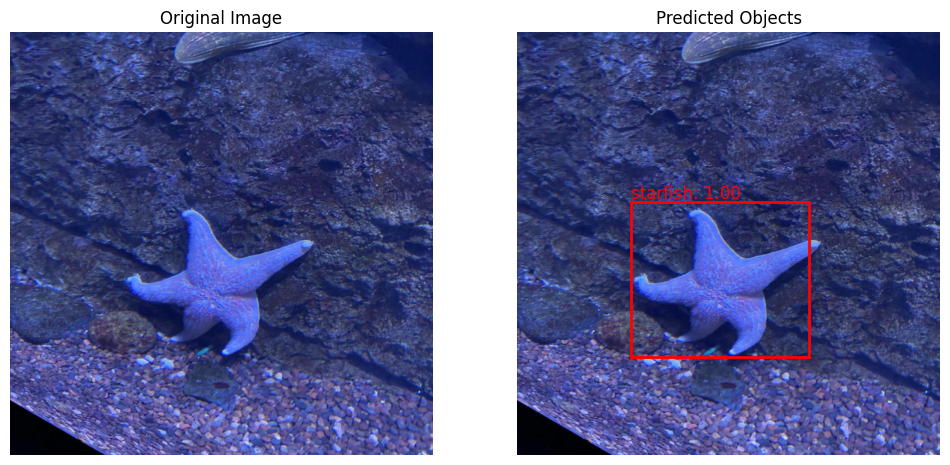

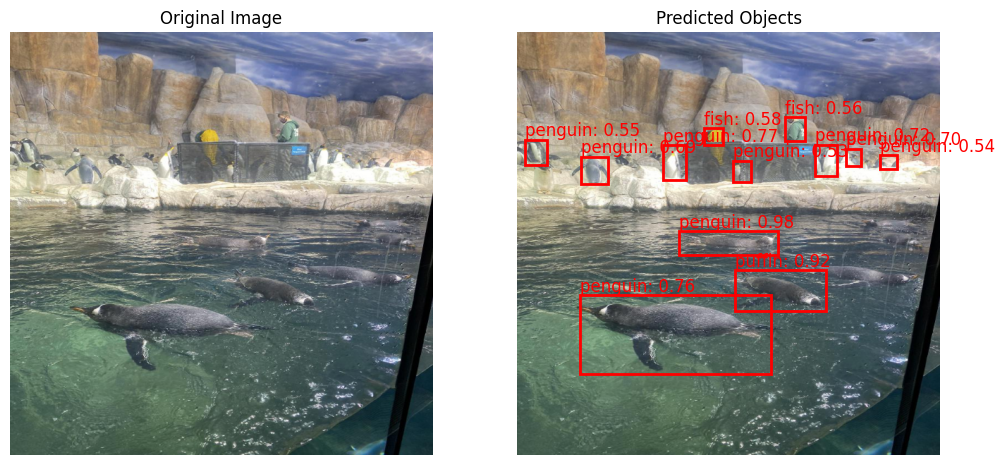

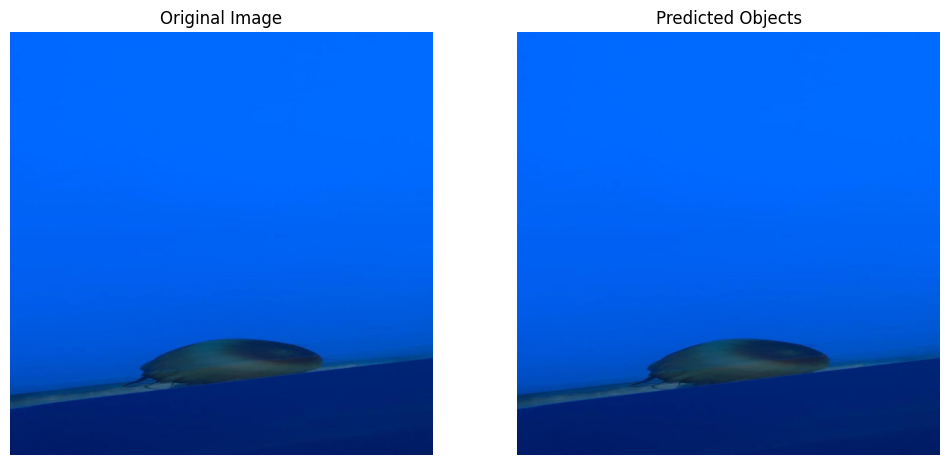

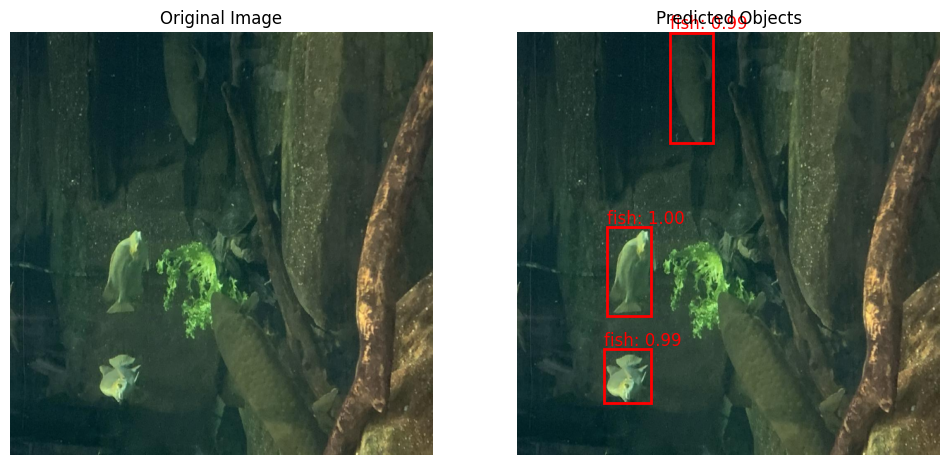

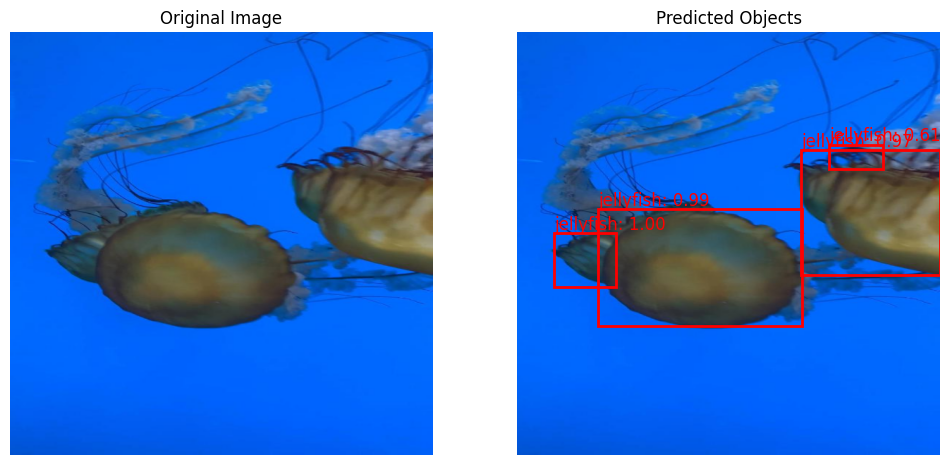

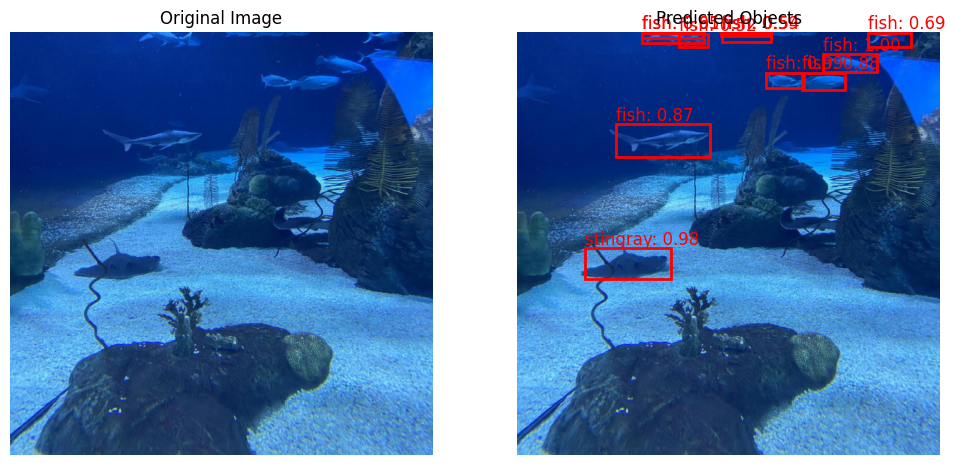

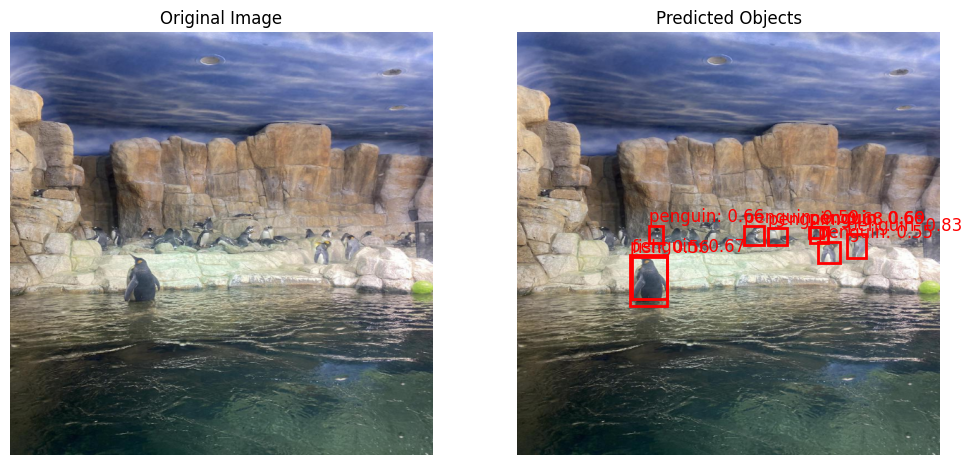

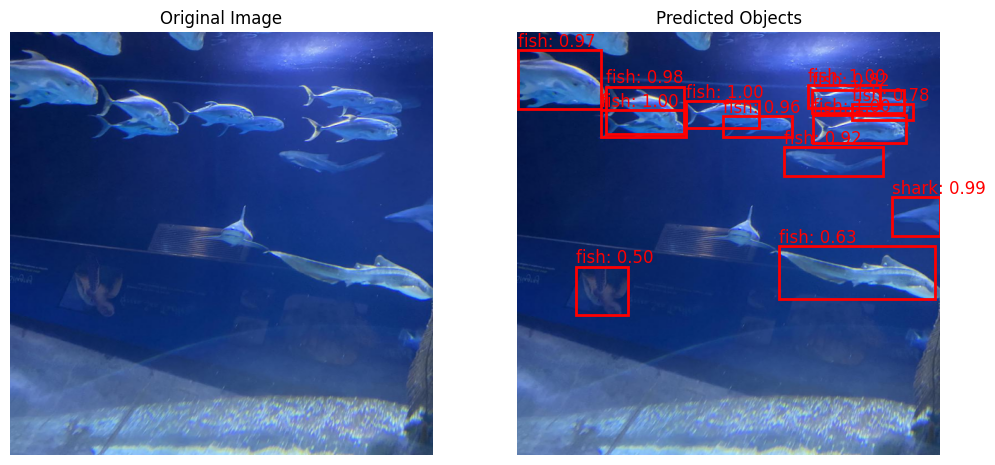

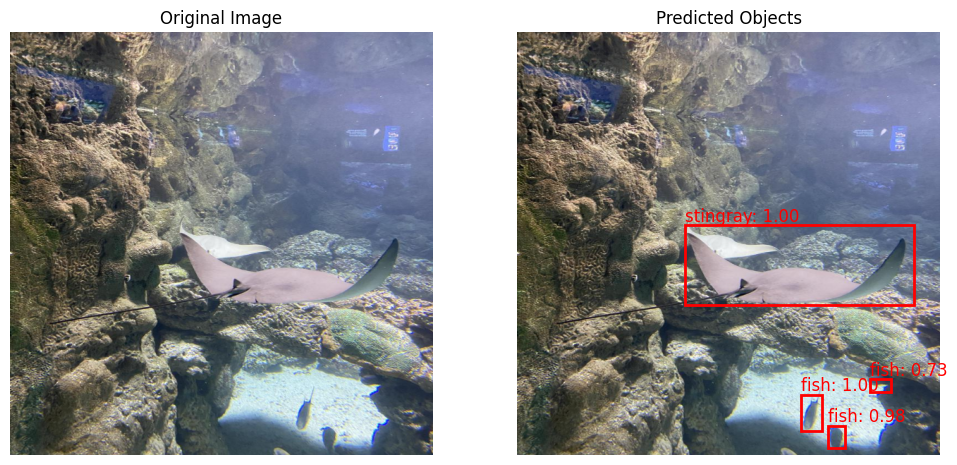

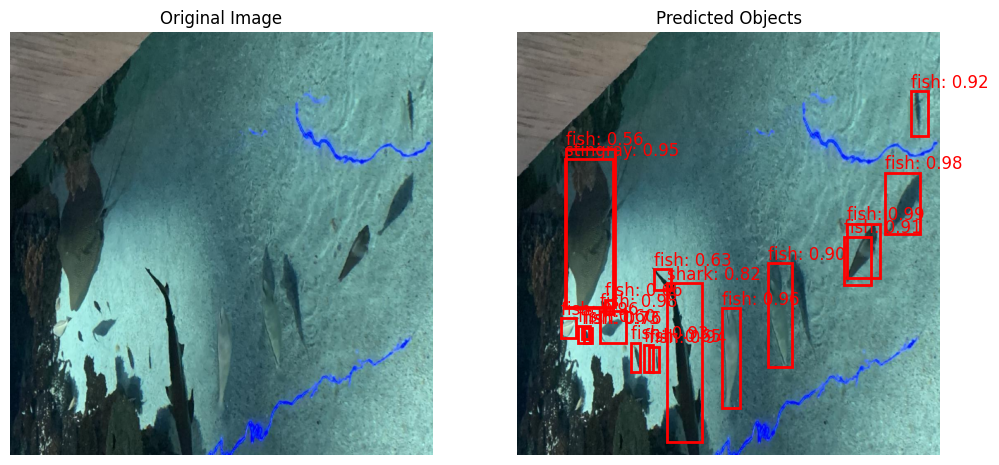

In [78]:
# Load labels map from the dataset
labels_map = {v['id']: v['name'] for v in train_dataset.coco.cats.values()}
print(labels_map)

# Create test DataLoader
test_dataset = AquariumDetection(root=dataset_path, split='test', transforms=get_test_transforms())
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Run evaluation
evaluate(model, test_loader, device, labels_map)

# Extra Code

In [79]:
# Data transformations for training data
def get_train_transforms():
    """
    Returns transformation pipeline for training images with augmentations 
    including resizing, flipping, brightness/contrast adjustments, and color jitter.
    """
    return A.Compose([
        A.Resize(600, 600),  # Resize images to 600x600 pixels
        A.HorizontalFlip(p=0.3),  # Apply horizontal flip with a probability of 30%
        A.VerticalFlip(p=0.3),  # Apply vertical flip with a probability of 30%
        A.RandomBrightnessContrast(p=0.1),  # Adjust brightness/contrast with 10% probability
        A.ColorJitter(p=0.1),  # Random color jitter with 10% probability
        ToTensorV2()  # Convert the image to a PyTorch tensor
    ], bbox_params=A.BboxParams(format='coco'))  # Bounding box format in COCO style

# Data transformations for test data (without augmentations)
def get_test_transforms():
    """
    Returns transformation pipeline for test images, only resizing and tensor conversion.
    """
    return A.Compose([
        A.Resize(600, 600),  # Resize images to 600x600 pixels
        ToTensorV2()  # Convert the image to a PyTorch tensor
    ], bbox_params=A.BboxParams(format='coco'))  # Bounding box format in COCO style

# Custom Dataset class for Aquarium Detection
class AquariumDetection(Dataset):
    def __init__(self, root, split='train', transforms=None):
        """
        Initializes dataset with root path, split (train/test), and transformations.
        Loads COCO annotations and filters images with annotations.

        Parameters:
        - root: path to the dataset
        - split: 'train' or 'test' to select dataset split
        - transforms: data augmentation transformations
        """
        self.root = root
        self.split = split
        self.transforms = transforms
        # Load COCO format annotations
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json"))
        # Filter image IDs that have at least one annotation
        self.ids = [img_id for img_id in sorted(self.coco.imgs.keys())
                    if len(self.coco.getAnnIds(img_id)) > 0]
    
    def __getitem__(self, index):
        """
        Retrieves image and target (bounding boxes and labels) by index.
        
        Parameters:
        - index: index to select image and target
        Returns:
        - Transformed image tensor and target dictionary
        """
        img_id = self.ids[index]  # Get image ID
        image = self.load_image(img_id)  # Load image using ID
        annotations = self.coco.loadAnns(self.coco.getAnnIds(img_id))  # Load annotations
        boxes = [ann['bbox'] + [ann['category_id']] for ann in annotations]  # Extract bounding boxes

        # Apply transformations if specified
        if self.transforms:
            transformed = self.transforms(image=image, bboxes=boxes)
            image = transformed['image']
            boxes = transformed['bboxes']
        
        # Convert bounding boxes to tensor format (x_min, y_min, x_max, y_max)
        boxes = torch.tensor([[x, y, x + w, y + h] for x, y, w, h, _ in boxes], dtype=torch.float32)
        labels = torch.tensor([ann['category_id'] for ann in annotations], dtype=torch.int64)  # Labels
        iscrowd = torch.tensor([ann.get('iscrowd', 0) for ann in annotations], dtype=torch.int64)  # Crowd labels

        # Prepare target dictionary
        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': torch.tensor([img_id]),
            'area': (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),  # Area of boxes
            'iscrowd': iscrowd
        }
        return image.div(255), target  # Normalize image

    def load_image(self, img_id):
        """
        Loads image from file path using OpenCV and converts to RGB.
        
        Parameters:
        - img_id: image ID to load
        Returns:
        - Loaded RGB image
        """
        img_path = self.coco.loadImgs(img_id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, img_path))
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

    def __len__(self):
        """Returns the total number of images with annotations in the dataset."""
        return len(self.ids)

# Model and training setup
dataset_path = "/kaggle/input/aquarium-dataset/Aquarium Combined/"
train_dataset = AquariumDetection(root=dataset_path, transforms=get_train_transforms())


# Modify the Faster R-CNN model for custom class predictions
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(
    model.roi_heads.box_predictor.cls_score.in_features, len(train_dataset.coco.cats)
)

# Optimizer setup with SGD
params = [p for p in model.parameters() if p.requires_grad]  # Only parameters with gradients
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)  # SGD optimizer

# Training loop for one epoch
def train_one_epoch(model, optimizer, loader, device, epoch):
    """
    Trains the model for one epoch, accumulating and printing losses.
    
    Parameters:
    - model: neural network model
    - optimizer: optimizer for backpropagation
    - loader: dataloader for training data
    - device: device to run computations (CPU/GPU)
    - epoch: current epoch number
    """
    model.train()
    total_loss = 0  # Initialize total loss for epoch
    loss_dict_accumulated = {  # Initialize dictionary to accumulate losses
        'loss_classifier': 0,
        'loss_box_reg': 0,
        'loss_objectness': 0,
        'loss_rpn_box_reg': 0
    }
    num_batches = len(loader)

    # Iterate through batches of images and targets
    for images, targets in tqdm(loader):
        images = [img.to(device) for img in images]  # Move images to device
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move targets to device

        # Calculate model losses
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())  # Sum all losses
        total_loss += losses.item()

        # Accumulate each loss type for averaging
        for key, loss_val in loss_dict.items():
            loss_dict_accumulated[key] += loss_val.item()

        # Backpropagation step
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    # Calculate and print average losses
    avg_total_loss = total_loss / num_batches
    avg_loss_dict = {key: val / num_batches for key, val in loss_dict_accumulated.items()}
    print(f"Epoch {epoch}:")
    print(f"  Average Total Loss: {avg_total_loss:.4f}")
    for loss_name, avg_loss in avg_loss_dict.items():
        print(f"  Average {loss_name}: {avg_loss:.4f}")

# Dataloader and Training Execution
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device
model.to(device)  # Move model to device

# Training loop across 10 epochs
for epoch in range(50):
    train_one_epoch(model, optimizer, train_loader, device, epoch)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


100%|██████████| 112/112 [00:14<00:00,  7.87it/s]


Epoch 0:
  Average Total Loss: 1.0532
  Average loss_classifier: 0.5000
  Average loss_box_reg: 0.4253
  Average loss_objectness: 0.0966
  Average loss_rpn_box_reg: 0.0313


100%|██████████| 112/112 [00:13<00:00,  8.05it/s]


Epoch 1:
  Average Total Loss: 0.8468
  Average loss_classifier: 0.4059
  Average loss_box_reg: 0.3566
  Average loss_objectness: 0.0573
  Average loss_rpn_box_reg: 0.0271


100%|██████████| 112/112 [00:13<00:00,  8.15it/s]


Epoch 2:
  Average Total Loss: 0.7492
  Average loss_classifier: 0.3333
  Average loss_box_reg: 0.3423
  Average loss_objectness: 0.0483
  Average loss_rpn_box_reg: 0.0253


100%|██████████| 112/112 [00:13<00:00,  8.23it/s]


Epoch 3:
  Average Total Loss: 0.7329
  Average loss_classifier: 0.2979
  Average loss_box_reg: 0.3712
  Average loss_objectness: 0.0397
  Average loss_rpn_box_reg: 0.0241


100%|██████████| 112/112 [00:13<00:00,  8.21it/s]


Epoch 4:
  Average Total Loss: 0.6785
  Average loss_classifier: 0.2727
  Average loss_box_reg: 0.3435
  Average loss_objectness: 0.0388
  Average loss_rpn_box_reg: 0.0235


100%|██████████| 112/112 [00:13<00:00,  8.29it/s]


Epoch 5:
  Average Total Loss: 0.6636
  Average loss_classifier: 0.2574
  Average loss_box_reg: 0.3463
  Average loss_objectness: 0.0374
  Average loss_rpn_box_reg: 0.0225


100%|██████████| 112/112 [00:13<00:00,  8.29it/s]


Epoch 6:
  Average Total Loss: 0.6470
  Average loss_classifier: 0.2463
  Average loss_box_reg: 0.3462
  Average loss_objectness: 0.0328
  Average loss_rpn_box_reg: 0.0217


100%|██████████| 112/112 [00:13<00:00,  8.35it/s]


Epoch 7:
  Average Total Loss: 0.6400
  Average loss_classifier: 0.2412
  Average loss_box_reg: 0.3439
  Average loss_objectness: 0.0333
  Average loss_rpn_box_reg: 0.0216


100%|██████████| 112/112 [00:13<00:00,  8.27it/s]


Epoch 8:
  Average Total Loss: 0.6186
  Average loss_classifier: 0.2285
  Average loss_box_reg: 0.3382
  Average loss_objectness: 0.0309
  Average loss_rpn_box_reg: 0.0210


100%|██████████| 112/112 [00:13<00:00,  8.40it/s]


Epoch 9:
  Average Total Loss: 0.6008
  Average loss_classifier: 0.2261
  Average loss_box_reg: 0.3278
  Average loss_objectness: 0.0269
  Average loss_rpn_box_reg: 0.0199


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 10:
  Average Total Loss: 0.6037
  Average loss_classifier: 0.2138
  Average loss_box_reg: 0.3456
  Average loss_objectness: 0.0250
  Average loss_rpn_box_reg: 0.0193


100%|██████████| 112/112 [00:13<00:00,  8.46it/s]


Epoch 11:
  Average Total Loss: 0.6045
  Average loss_classifier: 0.2179
  Average loss_box_reg: 0.3423
  Average loss_objectness: 0.0248
  Average loss_rpn_box_reg: 0.0194


100%|██████████| 112/112 [00:13<00:00,  8.41it/s]


Epoch 12:
  Average Total Loss: 0.5763
  Average loss_classifier: 0.2032
  Average loss_box_reg: 0.3286
  Average loss_objectness: 0.0245
  Average loss_rpn_box_reg: 0.0199


100%|██████████| 112/112 [00:13<00:00,  8.48it/s]


Epoch 13:
  Average Total Loss: 0.5959
  Average loss_classifier: 0.2095
  Average loss_box_reg: 0.3438
  Average loss_objectness: 0.0234
  Average loss_rpn_box_reg: 0.0191


100%|██████████| 112/112 [00:13<00:00,  8.47it/s]


Epoch 14:
  Average Total Loss: 0.5829
  Average loss_classifier: 0.2088
  Average loss_box_reg: 0.3334
  Average loss_objectness: 0.0224
  Average loss_rpn_box_reg: 0.0184


100%|██████████| 112/112 [00:13<00:00,  8.36it/s]


Epoch 15:
  Average Total Loss: 0.5686
  Average loss_classifier: 0.1976
  Average loss_box_reg: 0.3319
  Average loss_objectness: 0.0213
  Average loss_rpn_box_reg: 0.0178


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 16:
  Average Total Loss: 0.5787
  Average loss_classifier: 0.2069
  Average loss_box_reg: 0.3301
  Average loss_objectness: 0.0233
  Average loss_rpn_box_reg: 0.0184


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 17:
  Average Total Loss: 0.5494
  Average loss_classifier: 0.1952
  Average loss_box_reg: 0.3167
  Average loss_objectness: 0.0199
  Average loss_rpn_box_reg: 0.0176


100%|██████████| 112/112 [00:13<00:00,  8.46it/s]


Epoch 18:
  Average Total Loss: 0.5518
  Average loss_classifier: 0.1922
  Average loss_box_reg: 0.3232
  Average loss_objectness: 0.0192
  Average loss_rpn_box_reg: 0.0172


100%|██████████| 112/112 [00:13<00:00,  8.51it/s]


Epoch 19:
  Average Total Loss: 0.5583
  Average loss_classifier: 0.1895
  Average loss_box_reg: 0.3328
  Average loss_objectness: 0.0189
  Average loss_rpn_box_reg: 0.0172


100%|██████████| 112/112 [00:13<00:00,  8.49it/s]


Epoch 20:
  Average Total Loss: 0.5657
  Average loss_classifier: 0.1935
  Average loss_box_reg: 0.3363
  Average loss_objectness: 0.0190
  Average loss_rpn_box_reg: 0.0169


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 21:
  Average Total Loss: 0.5621
  Average loss_classifier: 0.1960
  Average loss_box_reg: 0.3273
  Average loss_objectness: 0.0213
  Average loss_rpn_box_reg: 0.0175


100%|██████████| 112/112 [00:13<00:00,  8.32it/s]


Epoch 22:
  Average Total Loss: 0.5392
  Average loss_classifier: 0.1853
  Average loss_box_reg: 0.3177
  Average loss_objectness: 0.0192
  Average loss_rpn_box_reg: 0.0169


100%|██████████| 112/112 [00:13<00:00,  8.35it/s]


Epoch 23:
  Average Total Loss: 0.5561
  Average loss_classifier: 0.1942
  Average loss_box_reg: 0.3264
  Average loss_objectness: 0.0194
  Average loss_rpn_box_reg: 0.0161


100%|██████████| 112/112 [00:13<00:00,  8.42it/s]


Epoch 24:
  Average Total Loss: 0.5846
  Average loss_classifier: 0.2122
  Average loss_box_reg: 0.3376
  Average loss_objectness: 0.0185
  Average loss_rpn_box_reg: 0.0163


100%|██████████| 112/112 [00:13<00:00,  8.23it/s]


Epoch 25:
  Average Total Loss: 0.5327
  Average loss_classifier: 0.1790
  Average loss_box_reg: 0.3174
  Average loss_objectness: 0.0200
  Average loss_rpn_box_reg: 0.0163


100%|██████████| 112/112 [00:13<00:00,  8.33it/s]


Epoch 26:
  Average Total Loss: 0.5513
  Average loss_classifier: 0.1796
  Average loss_box_reg: 0.3393
  Average loss_objectness: 0.0164
  Average loss_rpn_box_reg: 0.0160


100%|██████████| 112/112 [00:13<00:00,  8.39it/s]


Epoch 27:
  Average Total Loss: 0.5499
  Average loss_classifier: 0.1834
  Average loss_box_reg: 0.3335
  Average loss_objectness: 0.0167
  Average loss_rpn_box_reg: 0.0162


100%|██████████| 112/112 [00:13<00:00,  8.47it/s]


Epoch 28:
  Average Total Loss: 0.5438
  Average loss_classifier: 0.1753
  Average loss_box_reg: 0.3359
  Average loss_objectness: 0.0165
  Average loss_rpn_box_reg: 0.0161


100%|██████████| 112/112 [00:13<00:00,  8.29it/s]


Epoch 29:
  Average Total Loss: 0.5312
  Average loss_classifier: 0.1790
  Average loss_box_reg: 0.3196
  Average loss_objectness: 0.0170
  Average loss_rpn_box_reg: 0.0156


100%|██████████| 112/112 [00:13<00:00,  8.48it/s]


Epoch 30:
  Average Total Loss: 0.5353
  Average loss_classifier: 0.1770
  Average loss_box_reg: 0.3277
  Average loss_objectness: 0.0153
  Average loss_rpn_box_reg: 0.0152


100%|██████████| 112/112 [00:13<00:00,  8.30it/s]


Epoch 31:
  Average Total Loss: 0.5223
  Average loss_classifier: 0.1688
  Average loss_box_reg: 0.3213
  Average loss_objectness: 0.0165
  Average loss_rpn_box_reg: 0.0157


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 32:
  Average Total Loss: 0.5067
  Average loss_classifier: 0.1618
  Average loss_box_reg: 0.3143
  Average loss_objectness: 0.0158
  Average loss_rpn_box_reg: 0.0148


100%|██████████| 112/112 [00:13<00:00,  8.38it/s]


Epoch 33:
  Average Total Loss: 0.5309
  Average loss_classifier: 0.1751
  Average loss_box_reg: 0.3256
  Average loss_objectness: 0.0154
  Average loss_rpn_box_reg: 0.0149


100%|██████████| 112/112 [00:13<00:00,  8.54it/s]


Epoch 34:
  Average Total Loss: 0.5515
  Average loss_classifier: 0.1942
  Average loss_box_reg: 0.3280
  Average loss_objectness: 0.0146
  Average loss_rpn_box_reg: 0.0147


100%|██████████| 112/112 [00:13<00:00,  8.36it/s]


Epoch 35:
  Average Total Loss: 0.5281
  Average loss_classifier: 0.1760
  Average loss_box_reg: 0.3211
  Average loss_objectness: 0.0162
  Average loss_rpn_box_reg: 0.0148


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 36:
  Average Total Loss: 0.5252
  Average loss_classifier: 0.1696
  Average loss_box_reg: 0.3247
  Average loss_objectness: 0.0156
  Average loss_rpn_box_reg: 0.0153


100%|██████████| 112/112 [00:13<00:00,  8.41it/s]


Epoch 37:
  Average Total Loss: 0.5300
  Average loss_classifier: 0.1766
  Average loss_box_reg: 0.3226
  Average loss_objectness: 0.0151
  Average loss_rpn_box_reg: 0.0156


100%|██████████| 112/112 [00:13<00:00,  8.30it/s]


Epoch 38:
  Average Total Loss: 0.5258
  Average loss_classifier: 0.1729
  Average loss_box_reg: 0.3234
  Average loss_objectness: 0.0148
  Average loss_rpn_box_reg: 0.0148


100%|██████████| 112/112 [00:13<00:00,  8.43it/s]


Epoch 39:
  Average Total Loss: 0.5425
  Average loss_classifier: 0.1744
  Average loss_box_reg: 0.3375
  Average loss_objectness: 0.0151
  Average loss_rpn_box_reg: 0.0155


100%|██████████| 112/112 [00:13<00:00,  8.51it/s]


Epoch 40:
  Average Total Loss: 0.5201
  Average loss_classifier: 0.1665
  Average loss_box_reg: 0.3251
  Average loss_objectness: 0.0142
  Average loss_rpn_box_reg: 0.0143


100%|██████████| 112/112 [00:13<00:00,  8.50it/s]


Epoch 41:
  Average Total Loss: 0.5189
  Average loss_classifier: 0.1683
  Average loss_box_reg: 0.3197
  Average loss_objectness: 0.0164
  Average loss_rpn_box_reg: 0.0145


100%|██████████| 112/112 [00:13<00:00,  8.36it/s]


Epoch 42:
  Average Total Loss: 0.4977
  Average loss_classifier: 0.1608
  Average loss_box_reg: 0.3060
  Average loss_objectness: 0.0158
  Average loss_rpn_box_reg: 0.0152


100%|██████████| 112/112 [00:13<00:00,  8.48it/s]


Epoch 43:
  Average Total Loss: 0.5000
  Average loss_classifier: 0.1601
  Average loss_box_reg: 0.3125
  Average loss_objectness: 0.0136
  Average loss_rpn_box_reg: 0.0139


100%|██████████| 112/112 [00:13<00:00,  8.40it/s]


Epoch 44:
  Average Total Loss: 0.5042
  Average loss_classifier: 0.1647
  Average loss_box_reg: 0.3130
  Average loss_objectness: 0.0125
  Average loss_rpn_box_reg: 0.0140


100%|██████████| 112/112 [00:13<00:00,  8.45it/s]


Epoch 45:
  Average Total Loss: 0.5019
  Average loss_classifier: 0.1620
  Average loss_box_reg: 0.3119
  Average loss_objectness: 0.0135
  Average loss_rpn_box_reg: 0.0144


100%|██████████| 112/112 [00:13<00:00,  8.47it/s]


Epoch 46:
  Average Total Loss: 0.5058
  Average loss_classifier: 0.1596
  Average loss_box_reg: 0.3188
  Average loss_objectness: 0.0135
  Average loss_rpn_box_reg: 0.0139


100%|██████████| 112/112 [00:13<00:00,  8.47it/s]


Epoch 47:
  Average Total Loss: 0.4903
  Average loss_classifier: 0.1523
  Average loss_box_reg: 0.3121
  Average loss_objectness: 0.0127
  Average loss_rpn_box_reg: 0.0133


100%|██████████| 112/112 [00:13<00:00,  8.48it/s]


Epoch 48:
  Average Total Loss: 0.5051
  Average loss_classifier: 0.1592
  Average loss_box_reg: 0.3197
  Average loss_objectness: 0.0127
  Average loss_rpn_box_reg: 0.0135


100%|██████████| 112/112 [00:13<00:00,  8.28it/s]

Epoch 49:
  Average Total Loss: 0.5040
  Average loss_classifier: 0.1609
  Average loss_box_reg: 0.3170
  Average loss_objectness: 0.0123
  Average loss_rpn_box_reg: 0.0137
